# Bank Customer Chrun Rate Prediction

Problem Statement :
Customer churn or customer attrition is a tendency of clients or customers to
abandon a brand and stop being a paying client of a particular business or
organization. The percentage of customers that discontinue using a company’s
services or products during a specific period is called a customer churn rate. Several
bad experiences (or just one) are enough, and a customer may quit. And if a large
chunk of unsatisfied customers churn at a time interval, both material losses and
damage to reputation would be enormous.
A reputed bank “ABC BANK” wants to predict the Churn rate. Create a model by
using different machine learning approaches that can predict the best result.

Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the Churn Dataset

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')
df_copy = df.copy()
print(df.shape)
df.head(20)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Exploratory Data Analysis(EDA)

In [3]:
df.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


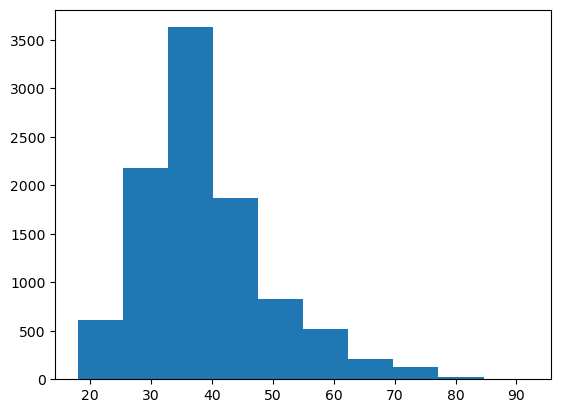

In [5]:
plt.hist(df['Age'])
plt.show()

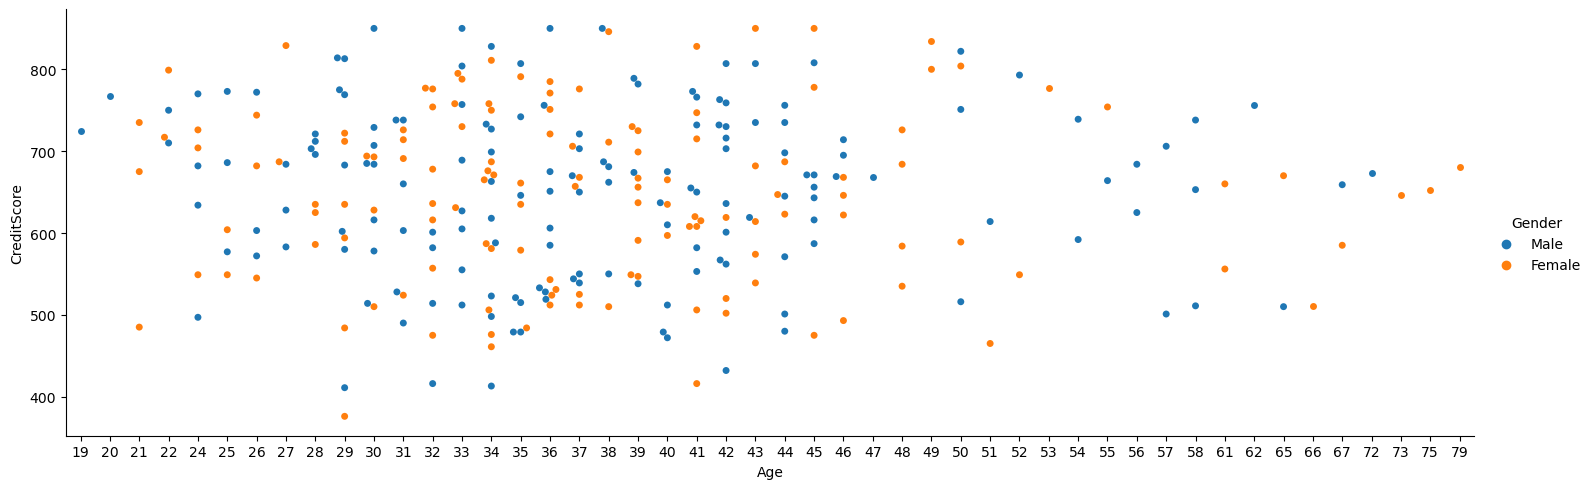

In [6]:

# df.loc[df['Age'].between(1,25,'both'),'grade'] = 'Young'
# df.loc[df['Age'].between(26,60,'both'),'grade'] = 'MiddelAged'
# df.loc[df['Age'].between(61,100,'both'),'grade'] = 'Elderly'

sns.catplot(data=df[:300], x="Age", y="CreditScore", hue="Gender", kind="swarm",aspect=3)

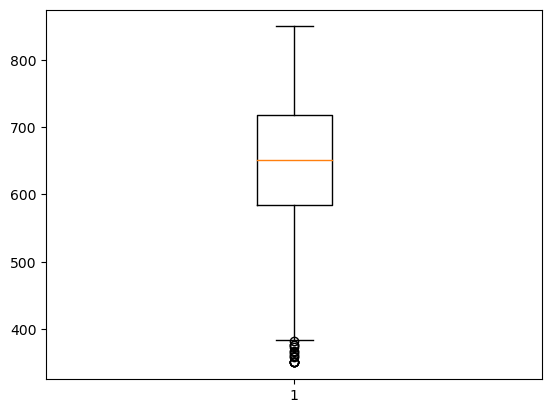

In [7]:
plt.boxplot(df['CreditScore'])
plt.show()

In [8]:
# plt.figure(figsize=(10,5))
# plt.title('Salary & CreditScores')
# plt.xlabel('EstimatedSalary')
# plt.ylabel('CreditScore')
# sns.scatterplot(df['EstimatedSalary'][:1000],df['CreditScore'][:1000])
# plt.show()

# Feature Engineering

Dropping RowNumber, CustomerId, Surname columns since they are unique and do not impact the model during Training.

In [9]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Convert categorical data to numerical data using LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
print(df.head(5))
df.info()

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cr

Divide the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

# split into inputs and outputs
X, y = df.iloc[:, :10], df.iloc[:, 10]
print(X.shape, y.shape)

(10000, 10) (10000,)


In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Use SMOTE to balance the target

In [13]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
# even distribution for both the classes
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [14]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11148, 10) (4778, 10) (11148,) (4778,)


Convert the data to standerdised form to improve model performance

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)
X_test

array([[-0.20728307,  0.43227254,  1.22165302, ...,  0.77330027,
        -0.74215578, -1.1859225 ],
       [-0.22915438,  0.43227254, -0.81856303, ...,  0.77330027,
        -0.74215578, -1.63683796],
       [ 0.95189635, -0.89852526, -0.81856303, ...,  0.77330027,
        -0.74215578, -1.00975248],
       ...,
       [-1.03839285,  0.43227254, -0.81856303, ...,  0.77330027,
        -0.74215578, -1.25507241],
       [-0.51348141,  1.76307033, -0.81856303, ...,  0.77330027,
        -0.74215578, -0.22916992],
       [-0.33851093,  1.76307033,  1.22165302, ...,  0.77330027,
         1.34742601, -1.26572805]])

# Model Training using Different Algorithms

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)

y_pred1 = LR_classifier.predict(X_test)

Evaluation Metrics(The classification report should contain):--
● Precision Value
● Recall Value
● F1 score
● Accuracy

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(y_test, y_pred1)
print(classification_report(y_test,y_pred1))

print ("Confusion Matrix : \n", cm1)

from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, y_pred1)
print ("Accuracy : ", a1)


              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2322
           1       0.77      0.76      0.77      2456

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778

Confusion Matrix : 
 [[1778  544]
 [ 591 1865]]
Accuracy :  0.7624529091670155


K Nearest Neighbours(KNN)

In [18]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
KNN_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN_classifier.fit(X_train, y_train)  

#Predicting the test set result  
y_pred2= KNN_classifier.predict(X_test)  

In [19]:
cm2 = confusion_matrix(y_test, y_pred2)

print(classification_report(y_test,y_pred2))
print("Confusion Matrix : \n", cm2)

a2 = accuracy_score(y_test, y_pred2)
print ("Accuracy : ", a2)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2322
           1       0.81      0.84      0.82      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778

Confusion Matrix : 
 [[1845  477]
 [ 401 2055]]
Accuracy :  0.8162411050648807


Random Forest

In [20]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
RF_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RF_classifier.fit(X_train, y_train) 

#Predicting the test set result  
y_pred3= RF_classifier.predict(X_test) 

In [21]:
cm3 = confusion_matrix(y_test, y_pred3)

print(classification_report(y_test,y_pred3))
print ("Confusion Matrix : \n", cm3)

a3 = accuracy_score(y_test, y_pred3)
print ("Accuracy : ", a3)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2322
           1       0.85      0.81      0.83      2456

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778

Confusion Matrix : 
 [[1976  346]
 [ 460 1996]]
Accuracy :  0.8313101716199247


XG Boost

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
y_pred4 = xgb.predict(X_test)

y_pred4

array([0, 1, 1, ..., 1, 0, 0])

In [24]:
cm4 = confusion_matrix(y_test, y_pred4)

print(classification_report(y_test,y_pred4))
print ("Confusion Matrix : \n", cm4)

a4 = accuracy_score(y_test, y_pred4)
print ("Accuracy : ", a4)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2322
           1       0.85      0.84      0.85      2456

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778

Confusion Matrix : 
 [[1967  355]
 [ 392 2064]]
Accuracy :  0.843658434491419


Light Gradient Boosting Algorithm(LGBM)

In [25]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [26]:
y_pred5 = clf.predict(X_test)
y_pred5

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [27]:
cm5 = confusion_matrix(y_test, y_pred5)

print(classification_report(y_test,y_pred5))
print ("Confusion Matrix : \n", cm5)

a5 = accuracy_score(y_test, y_pred5)
print ("Accuracy : ", a5)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2322
           1       0.85      0.85      0.85      2456

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

Confusion Matrix : 
 [[1963  359]
 [ 364 2092]]
Accuracy :  0.8486814566764337


Comparing the accuracy of the different models

In [28]:
print("Logistic Regression: "+str("%.3f"%a1)+"\n"+"KNN: "+str("%.3f"%a2)+"\n"+"Random Forest: "
      +str("%.3f"%a3)+"\n"+"XGBoost: "+str("%.3f"%a4)+"\n"+"LGBM: "+str("%.3f"%a5))

Logistic Regression: 0.762
KNN: 0.816
Random Forest: 0.831
XGBoost: 0.844
LGBM: 0.849


In [29]:
#Since XGBoost and LGBM have almost same accuracy, we can use any of the two or both of them .
#Now let us see the performance of the model on the whole dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_copy.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df_copy['Geography'] = le.fit_transform(df['Geography'])
df_copy['Gender'] = le.fit_transform(df['Gender'])

X, y = df_copy.iloc[:, :10], df_copy.iloc[:, 10]
X = sc.fit_transform(X)
df_copy.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [30]:
y_final1 = xgb.predict(X)

cm_final1 = confusion_matrix(y, y_final1)

print(classification_report(y,y_final1))
print ("Confusion Matrix : \n", cm_final1)

a_final1 = accuracy_score(y, y_final1)
print ("Accuracy : ", a_final1)


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7963
           1       0.53      0.77      0.63      2037

    accuracy                           0.82     10000
   macro avg       0.73      0.80      0.75     10000
weighted avg       0.85      0.82      0.83     10000

Confusion Matrix : 
 [[6587 1376]
 [ 466 1571]]
Accuracy :  0.8158


In [31]:
y_final2 = clf.predict(X)

cm_final2 = confusion_matrix(y, y_final2)

print(classification_report(y,y_final2))
print ("Confusion Matrix : \n", cm_final2,"\n")

a_final2 = accuracy_score(y, y_final2)
print ("Accuracy : ", a_final1)


              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7963
           1       0.53      0.78      0.63      2037

    accuracy                           0.81     10000
   macro avg       0.73      0.80      0.75     10000
weighted avg       0.85      0.81      0.82     10000

Confusion Matrix : 
 [[6546 1417]
 [ 457 1580]] 

Accuracy :  0.8158


For the final prediction the accuray of both models are equal but the recall, score f1 score, and the precision for the XGBoost model is higher than that of LGBM. So we can conclude that the XGBoost classifier model is best suited for this classification problem.